<a href="https://colab.research.google.com/github/NadyaPutriAmalia/PCVK_Ganjil_2023/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TUGAS PRAKTIKUM**

In [1]:
from google.colab import drive

#Accessing My Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [39]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np

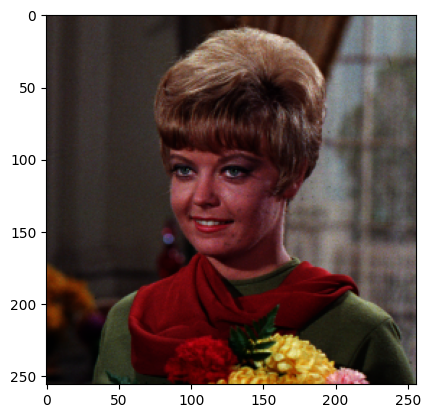

In [57]:

original = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
img = (cv.cvtColor(original, cv.COLOR_BGR2RGB)) #konversi channel BGR -> RGB
plt.imshow(img)

**1. Gamma Correction**

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


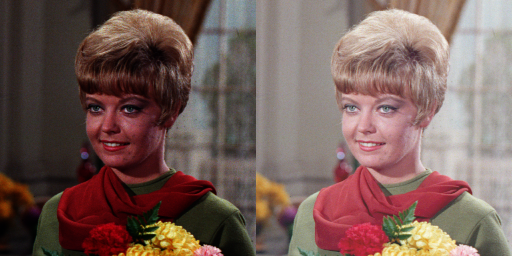

In [6]:

print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
 gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
 print('Error, not a number')

original = cv.cvtColor(img,cv.COLOR_BGR2RGB)
gamma_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]): #range (function) lebar
  for x in range(original.shape[1]): #panjang
    for c in range(original.shape[2]): #channel warna
     gamma_image[y,x,c] = np.clip(255 * pow(original[y,x,c] / 255, (1 / gamma)), 0, 255)

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

**2. Image Depth**

 Image Depth
---------------------------------


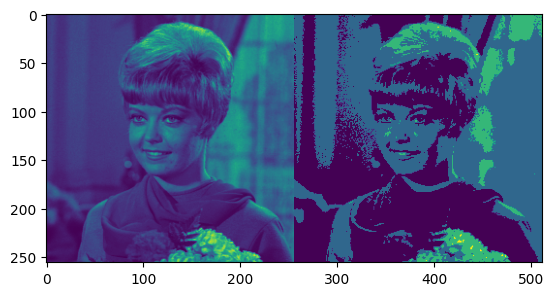

In [53]:
print(' Image Depth')
print('---------------------------------')

bit_depth=2
level = 255 / (pow(2,bit_depth)-1)
original = cv.imread("/content/drive/MyDrive/PCVK/Images/female.tiff", cv.IMREAD_GRAYSCALE)

bit_depth_image = np.zeros(original.shape, original.dtype)

#akses per piksel -> hanya 2 loop karena greyscale hanya 2 matriks
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
       bit_depth_image[y,x] = np.clip(round(original[y,x] / level) * level, 0, 255)

final_frame = cv.hconcat((original, bit_depth_image))
plt.imshow(final_frame)

**3. Average Denoising**



*   Citra 5


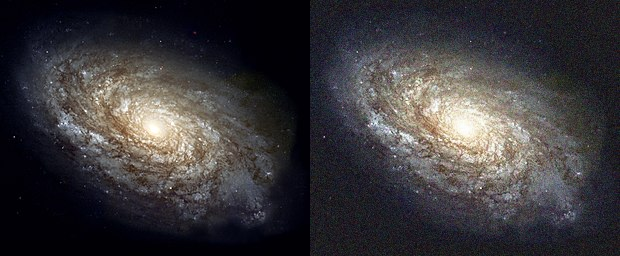

Nilai PSNR adalah 27.530574739582818 (dB)
Nilai MSE adalah 114.8214129704301


In [12]:
import glob
from math import log10, sqrt

original = cv.imread('/content/drive/MyDrive/PCVK/Images/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/Images/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

dst = cv_img[0]
noise_number = 4 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  #MSE 0 maka tidak ada noise sama sekali, sehingga PNSR tidak memiliki arti
        return 100, mse
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr, mse


compressed = dst
psnr = PSNR(original, compressed)
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)


psnr, mse = PSNR(original, compressed)
print('Nilai PSNR adalah', psnr, '(dB)')
print('Nilai MSE adalah', mse)


*   Citra 10



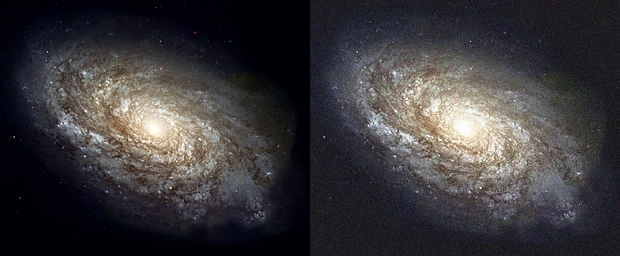

Nilai PSNR adalah 27.549322419832368 (dB)
Nilai MSE adalah 114.32681871639785


In [13]:
import glob
from math import log10, sqrt

original = cv.imread('/content/drive/MyDrive/PCVK/Images/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/Images/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

dst = cv_img[0]
noise_number = 9 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  #MSE 0 maka tidak ada noise sama sekali, sehingga PNSR tidak memiliki arti
        return 100, mse
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr, mse


compressed = dst
psnr = PSNR(original, compressed)
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)


psnr, mse = PSNR(original, compressed)
print('Nilai PSNR adalah', psnr, '(dB)')
print('Nilai MSE adalah', mse)



*   Citra 20



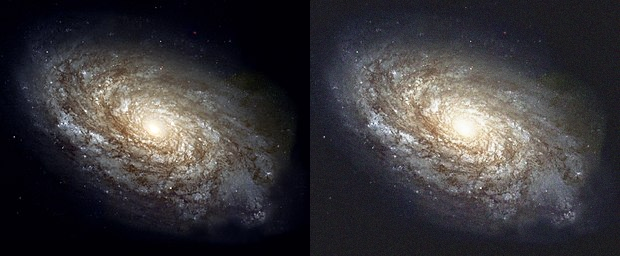

Nilai PSNR adalah 27.547782338819214 (dB)
Nilai MSE adalah 114.36736811155914


In [14]:
import glob
from math import log10, sqrt

original = cv.imread('/content/drive/MyDrive/PCVK/Images/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/Images/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

dst = cv_img[0]
noise_number = 19 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  #MSE 0 maka tidak ada noise sama sekali, sehingga PNSR tidak memiliki arti
        return 100, mse
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr, mse


compressed = dst
psnr = PSNR(original, compressed)
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)


psnr, mse = PSNR(original, compressed)
print('Nilai PSNR adalah', psnr, '(dB)')
print('Nilai MSE adalah', mse)



*   Citra 40



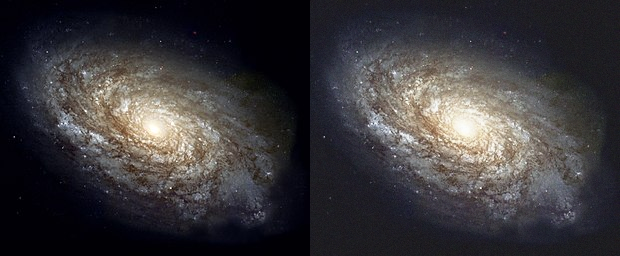

Nilai PSNR adalah 27.497956277118 (dB)
Nilai MSE adalah 115.68704637096774


In [15]:
import glob
from math import log10, sqrt

original = cv.imread('/content/drive/MyDrive/PCVK/Images/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/Images/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

dst = cv_img[0]
noise_number = 39 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  #MSE 0 maka tidak ada noise sama sekali, sehingga PNSR tidak memiliki arti
        return 100, mse
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr, mse


compressed = dst
psnr = PSNR(original, compressed)
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)


psnr, mse = PSNR(original, compressed)
print('Nilai PSNR adalah', psnr, '(dB)')
print('Nilai MSE adalah', mse)



*   Citra 80



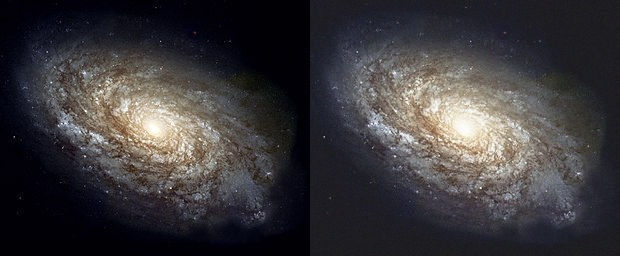

Nilai PSNR adalah 27.501528883244934 (dB)
Nilai MSE adalah 115.5919186827957


In [16]:
import glob
from math import log10, sqrt

original = cv.imread('/content/drive/MyDrive/PCVK/Images/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/Images/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

dst = cv_img[0]
noise_number = 79 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  #MSE 0 maka tidak ada noise sama sekali, sehingga PNSR tidak memiliki arti
        return 100, mse
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr, mse


compressed = dst
psnr = PSNR(original, compressed)
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)


psnr, mse = PSNR(original, compressed)
print('Nilai PSNR adalah', psnr, '(dB)')
print('Nilai MSE adalah', mse)



*   Citra 100



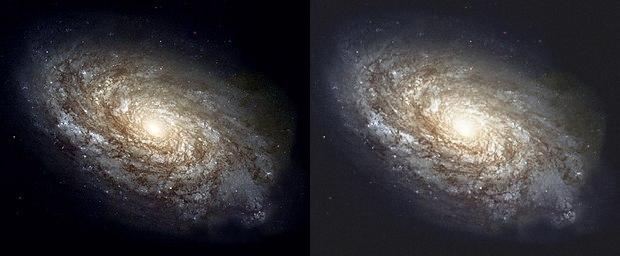

Nilai PSNR adalah 27.510142787627125 (dB)
Nilai MSE adalah 115.36287802419355


In [17]:
import glob
from math import log10, sqrt

original = cv.imread('/content/drive/MyDrive/PCVK/Images/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/Images/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

dst = cv_img[0]
noise_number = 99 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  #MSE 0 maka tidak ada noise sama sekali, sehingga PNSR tidak memiliki arti
        return 100, mse
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr, mse


compressed = dst
psnr = PSNR(original, compressed)
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)


psnr, mse = PSNR(original, compressed)
print('Nilai PSNR adalah', psnr, '(dB)')
print('Nilai MSE adalah', mse)

**Hasil PSNR**

MSE digunakan untuk mengukur sejauh mana citra yang telah mengalami kompresi atau distorsi mendekati citra asli. Nilai MSE yang lebih rendah menunjukkan bahwa citra yang telah diolah mendekati citra asli dengan lebih baik.

**4. Image Masking**

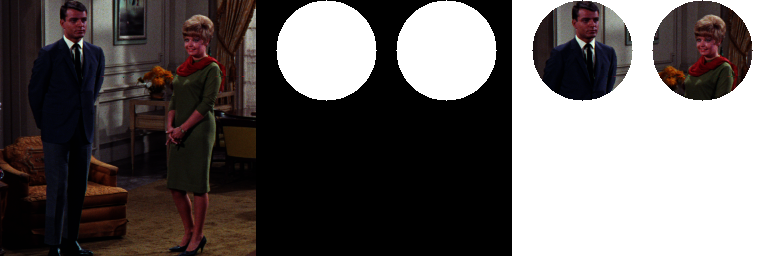

In [44]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/couple.tiff')
mask = np.zeros(img.shape, img.dtype)
mask = cv.circle(mask, (70, 50), 50, (255,255,255), -1)

mask2 = np.zeros(img.shape, dtype=np.uint8)
mask2 = cv.circle(mask,(190, 50), 50, (255,255,255), -1)

result = img & mask & mask2
result[mask==0] = 255
final_frame = cv.hconcat((img, mask, result))
cv2_imshow(final_frame)

**5. Lakukan percobaan menggunakan operator lain dan tunjukkan hasilnya pada modul ini.
Tuliskan hasil analisa anda kenapa citra keluarannya seperti itu**

1. NOT

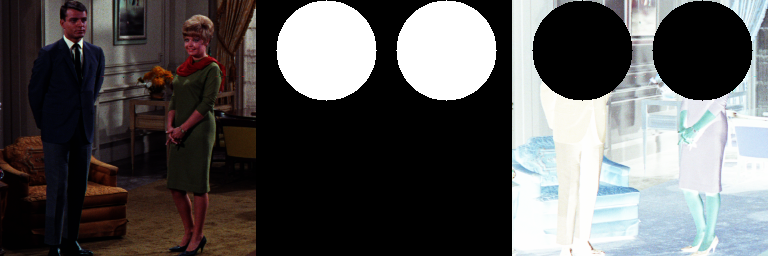

In [43]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/couple.tiff')
mask2 = np.zeros(img.shape, dtype=np.uint8)
mask2 = cv.circle(mask,(190, 50), 50, (255,255,255), -1)

result = ~img & ~mask2
final_frame = cv.hconcat((img, mask, result))
cv2_imshow(final_frame)

2. 0R

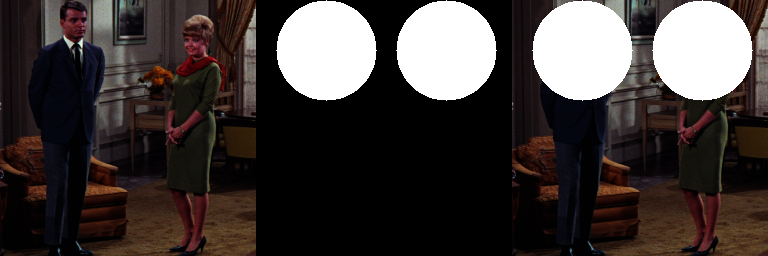

In [45]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/couple.tiff')
mask2 = np.zeros(img.shape, dtype=np.uint8)
mask2 = cv.circle(mask,(190, 50), 50, (255,255,255), -1)

result = img | mask2
final_frame = cv.hconcat((img, mask, result))
cv2_imshow(final_frame)

3. AND

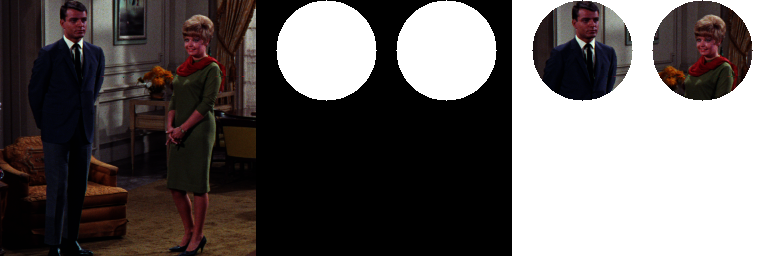

In [46]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/couple.tiff')
mask = np.zeros(img.shape, img.dtype)
mask = cv.circle(mask, (70, 50), 50, (255,255,255), -1)

mask2 = np.zeros(img.shape, dtype=np.uint8)
mask2 = cv.circle(mask,(190, 50), 50, (255,255,255), -1)

result = img & mask & mask2
result[mask==0] = 255
final_frame = cv.hconcat((img, mask, result))
cv2_imshow(final_frame)

4. NAND

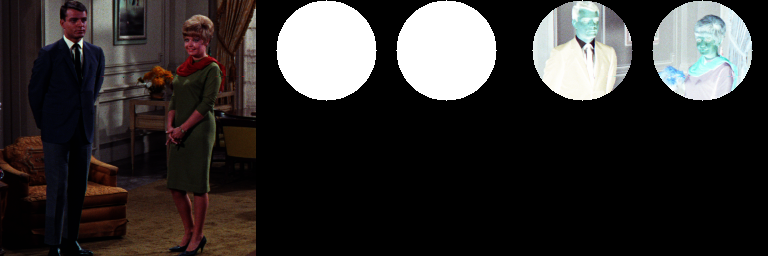

In [47]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/couple.tiff')
mask2 = np.zeros(img.shape, dtype=np.uint8)
mask2 = cv.circle(mask,(190, 50), 50, (255,255,255), -1)

result = ~img & mask2
final_frame = cv.hconcat((img, mask, result))
cv2_imshow(final_frame)

5. XOR

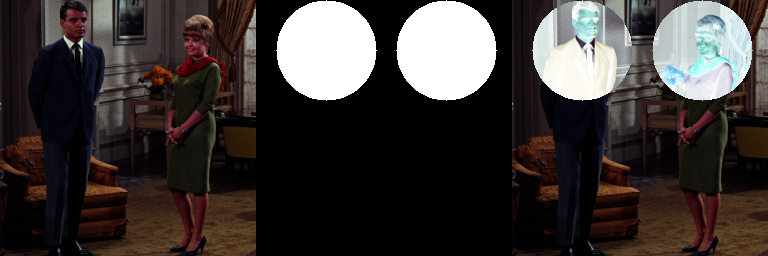

In [48]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/couple.tiff')
mask2 = np.zeros(img.shape, dtype=np.uint8)
mask2 = cv.circle(mask,(190, 50), 50, (255,255,255), -1)

result = img ^ mask2
final_frame = cv.hconcat((img, mask, result))
cv2_imshow(final_frame)

**Hasil Analisa**

**TUGAS KELOMPOK 3**

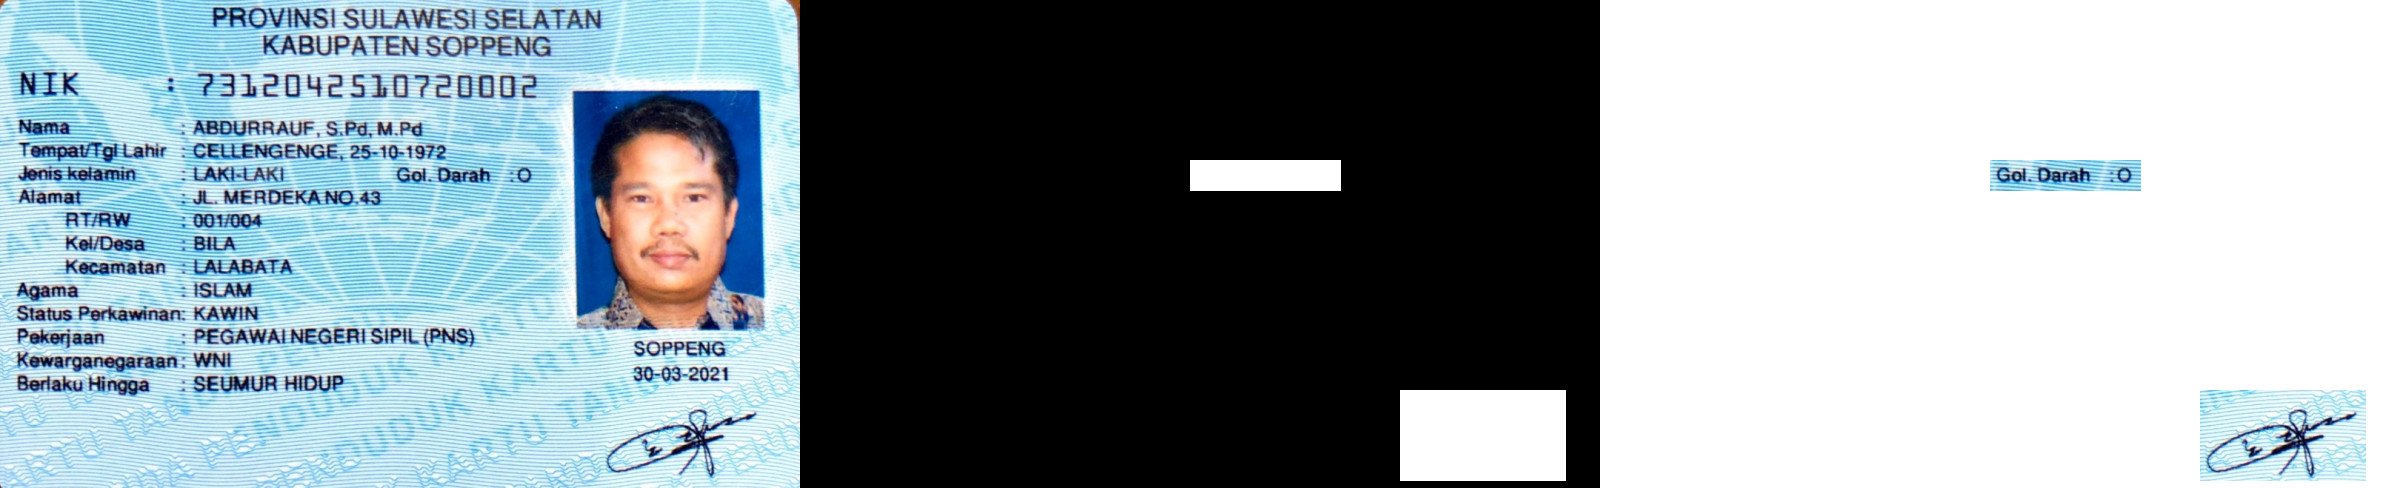

In [90]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/KTP.jpeg')

mask = np.zeros(img.shape, img.dtype)
mask = cv.rectangle(mask,pt1=(390,160),pt2=(540,190),color=(255,255,255),thickness=-1)

mask2 = np.zeros(img.shape, dtype=np.uint8)
mask2 = cv.rectangle(mask,pt1=(600,390),pt2=(765,480),color=(255,255,255),thickness=-1)

# Menyimpan hasil mask
output_path_mask = '/content/drive/MyDrive/PCVK/Images/prak_mask.jpeg'
cv2.imwrite(output_path_mask, mask)

# Menyimpan hasil output
output_path_result = '/content/drive/MyDrive/PCVK/Images/prak_Out.jpeg'
cv2.imwrite(output_path_result, result)

result = img & mask & mask2
result[mask==0] = 255
final_frame = cv.hconcat((img, mask, result))
cv2_imshow(final_frame)

**Hasil Analisa**

Untuk mengambil bagian pada Alamat dan Kecamatan dengan menggunakan Image Masking, yaitu melakukan penentuan titik koordinat.


*   Digunakan untuk menutupi area Golongan Darah.

  ```
  mask = np.zeros(img.shape, img.dtype)
  mask = cv.rectangle(mask,pt1=(390,160),pt2=(540,190),color=(255,255,255),thickness=-1)
  ```
*   Digunakan untuk menutupi area Tanda Tangan.

  ```
  mask2 = np.zeros(img.shape, dtype=np.uint8)
  mask2 = cv.rectangle(mask,pt1=(600,390),pt2=(765,480),color=(255,255,255),thickness=-1)
  ```
*   Digunakan untuk menyimpan image mask.

  ```
  output_path_mask = '/content/drive/MyDrive/PCVK/Images/prak_mask.jpeg'
  cv2.imwrite(output_path_mask, mask)
  ```

*   Digunakan untuk menyimpan image result.

  ```
  # Toutput_path_result = '/content/drive/MyDrive/PCVK/Images/prak_Out.jpeg'
  cv2.imwrite(output_path_result, result)
  ```
*   Menggunakan operator AND antara gambar asli dengan kedua mask. Dengan menghasilkan gambar yang diambil, sementara lainnya menjadi hitam

  ```
  result = img & mask & mask2
  ```
*   Pada hasil akhir disusun dengan menggabungkan gambar asli dan image mask.
  ```
  result[mask==0] = 255
  final_frame = cv.hconcat((img, mask, result))
  cv2_imshow(final_frame)
  ```
Dengan demikian, Image Masking adalah teknik yang sangat berguna dalam mengambil dan melindungi area tertentu dalam sebuah gambar, yang memiliki berbagai kegunaan seperti privasi, keamanan, dan pengolahan data dalam berbagai konteks.